## Signal Generation Basics

This example demonstrates the fundamentals of digital signal generation:
- Creating binary sequences (PRBS)
- Mapping bits to symbols
- Generating OOK (On-Off Keying) waveforms
- Understanding samples per symbol (sps)
- Visualizing signals in time and frequency domains

Learning objectives:
- Understand the relationship between symbol rate, sampling rate, and sps
- Learn how digital information is represented as analog waveforms
- Explore the spectral characteristics of different pulse shapes

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from commstools import set_backend, Signal
from commstools.dsp.sequences import prbs
from commstools.waveforms import ook

set_backend("jax")

# Generate a Pseudo-Random Binary Sequence (PRBS)
bits = prbs(length=100000, order=31, seed=2000460000)

# Define system parameters
symbol_rate = 50e6  # 10 kHz symbol rate (10,000 symbols per second)
sampling_rate = 400e6  # 100 kHz sampling rate (100,000 samples per second)
sps = int(sampling_rate / symbol_rate)  # Samples per symbol


In [ ]:
sig_impulse = ook(bits, sampling_rate=sampling_rate, sps=sps, pulse_shape="none")

sig_impulse.plot_signal()

sig_impulse.plot_psd()

plt.show()


In [ ]:
# 2. Boxcar (rectangular) pulse
sig_boxcar = ook(bits, sampling_rate=sampling_rate, sps=sps, pulse_shape="boxcar")
print(f"✓ Boxcar signal: {len(sig_boxcar.samples)} samples")

# 3. Gaussian pulse (smooth transitions)
sig_gaussian = ook(
    bits, sampling_rate=sampling_rate, sps=sps, pulse_shape="gaussian", bt=0.7, span=8
)
print(f"✓ Gaussian signal: {len(sig_gaussian.samples)} samples")

# 4. Root Raised Cosine (RRC) - optimal for ISI control
sig_rrc = ook(
    bits,
    sampling_rate=sampling_rate,
    sps=sps,
    pulse_shape="rrc",
    rolloff=0.35,
    span=8,
)
print(f"✓ RRC signal: {len(sig_rrc.samples)} samples")

# 5. Sinc pulse (ideal low-pass)
sig_sinc = ook(
    bits,
    sampling_rate=sampling_rate,
    sps=sps,
    pulse_shape="sinc",
    span=8,
)
print(f"✓ Sinc signal: {len(sig_sinc.samples)} samples")

# =============================================================================
# Step 4: Visualize Signals in Time Domain
# =============================================================================
print("\n[Step 4] Visualizing Time Domain Signals")
print("-" * 70)

fig, axs = plt.subplots(5, 1, figsize=(8, 7))

# Plot a short segment to see the pulse shapes clearly
samples_to_plot = 500

for idx, (sig, label) in enumerate(
    [
        (sig_impulse, "Impulse (No Pulse Shaping)"),
        (sig_boxcar, "Boxcar (Rectangular)"),
        (sig_gaussian, "Gaussian"),
        (sig_rrc, "RRC"),
        (sig_sinc, "Sinc Pulse"),
    ]
):
    t = np.arange(samples_to_plot) / sampling_rate * 1e6  # Convert to microseconds
    axs[idx].plot(t, sig.samples[:samples_to_plot].real)
    axs[idx].set_ylabel("Amplitude")
    axs[idx].set_title(label, fontweight="bold")

    # Mark symbol boundaries
    for i in range(0, samples_to_plot, sps):
        axs[idx].axvline(
            x=i / sampling_rate * 1e6, color="red", linestyle="--", linewidth=0.5
        )

axs[-1].set_xlabel("Time (μs)")

plt.show()

# =============================================================================
# Step 5: Visualize Power Spectral Density (PSD)
# =============================================================================
print("\n[Step 5] Visualizing Frequency Domain (PSD)")
print("-" * 70)

fig, axs = plt.subplots(5, 1, figsize=(8, 12))
axs = axs.flatten()

for idx, (sig, label) in enumerate(
    [
        (sig_impulse, "Impulse"),
        (sig_boxcar, "Boxcar"),
        (sig_gaussian, "Gaussian"),
        (sig_rrc, "RRC"),
        (sig_sinc, "Sinc"),
    ]
):
    sig.plot_psd(ax=axs[idx], nperseg=256)
    axs[idx].set_title(label)
    # axs[idx].set_ylim(-80, -20)
    axs[idx].grid(True, alpha=0.3)

plt.show()


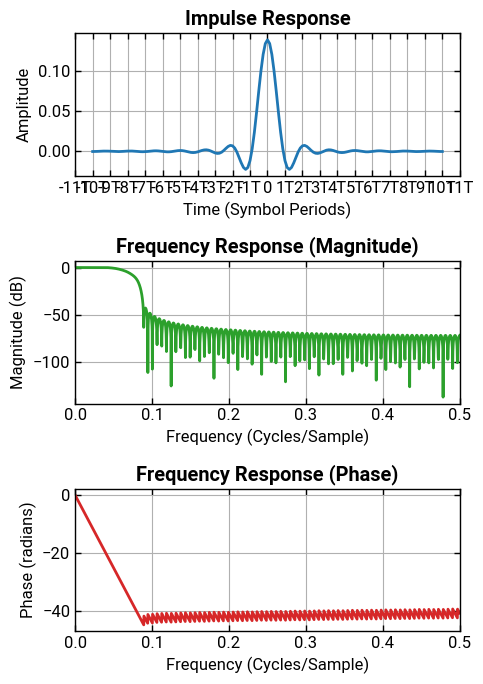

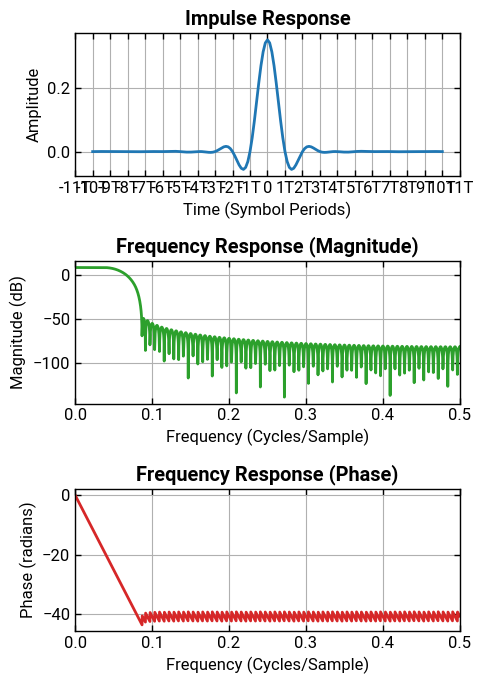

In [1]:
import commstools.dsp.filters as filters
import matplotlib.pyplot as plt
import commstools.plotting as plotting

sps = 8
span = 10

rrc = filters.rrc_taps(sps, 0.4, span=span)

plotting.filter_response(rrc, sps=sps)
plt.show()

matched = filters.matched_filter(rrc, rrc)

plotting.filter_response(matched, sps=sps)
plt.show()

# sinc = filters.sinc_taps(sps, span=span)


# gauss = filters.gaussian_taps(sps, bt=0.1, span=span)
